# Chicago Crime Rates

## Inspiration
How has crime changed over the years? Is it possible to predict where or when a crime will be committed? Which areas of the city have evolved over this time span?

## Context
- This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. 
- Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. 
- In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.
- The dataset contains more than 6,000,000 records/rows of data and cannot be viewed in full in Microsoft Excel. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

## Content
- `ID` - Unique identifier for the record.

- `Case Number` - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

- `Date` - Date when the incident occurred. this is sometimes a best estimate.

- `Block` - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

- `IUCR` - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- `Primary Type` - The primary description of the IUCR code.

- `Description` - The secondary description of the IUCR code, a subcategory of the primary description.

- `Location Description` - Description of the location where the incident occurred.

- `Arrest` - Indicates whether an arrest was made.

- `Domestic` - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- `Beat` - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- `District` - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- `Ward` - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

- `Community Area` - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- `FBI Code` - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- `X Coordinate` - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- `Y Coordinate` - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- `Year` - Year the incident occurred.

- `Updated On` - Date and time the record was last updated.

- `Latitude` - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- `Longitude` - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- `Location` - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

# 1. Import Libaries and Load Dataset

In [108]:
# import EDA libraies and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import forecast libraries and packages
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# configurations
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

# suppress harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
# load all datasets
df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [31]:
# preview dataset
# df1.head(3)
# df2.head(3)
# df3.head(3)
df4.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"


In [32]:
# concatenate all datasets into 1
df = pd.concat([df1,df2,df3,df4])

# 2. Explore dataset

In [33]:
# preview dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [36]:
df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,323,3.0,6.0,69.0,26,1178696.0,1.85532e+06,2016.0,05/10/2016 03:56:50 PM,41.7583,-87.620658,"(41.75830866, -87.620658418)"


In [35]:
# shape of dataset
print("# rows : ", df.shape[0])
print("# cols : ", df.shape[1])

# rows :  7941282
# cols :  23


In [38]:
# missing records in dataset
np.round((df.isnull().sum()/df.shape[0])*100, 2)

Unnamed: 0              0.00
ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.03
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    8.82
Community Area          8.84
FBI Code                0.00
X Coordinate            1.33
Y Coordinate            1.33
Year                    0.00
Updated On              0.00
Latitude                1.33
Longitude               1.33
Location                1.33
dtype: float64

- since the missing values are very less when compared to the size of the dataset
- we will drop the missing values

In [40]:
# drop missing values
df.dropna(inplace=True)

In [41]:
# check for missing values if any
np.round((df.isnull().sum()/df.shape[0])*100, 2)

Unnamed: 0              0.0
ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
IUCR                    0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
Location                0.0
dtype: float64

- all missing values have been removed

In [42]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [43]:
# for time series forecast, we will need only very few features from the dataset
# let us create a filtered dataset for time series forecast
df_ts = df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year',
       'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], axis=1)

In [44]:
df_ts.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False


In [46]:
# format for fbprophet
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [47]:
df_ts.head(3)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
6,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True


- Date has been formatted

## Univariate Analysis

### `Primary Type`

In [51]:
# types of crime categories
print("Total types of crime categories :", df_ts['Primary Type'].nunique(), "\n")
df_ts['Primary Type'].value_counts()

Total types of crime categories : 34 



THEFT                                1476357
BATTERY                              1298239
CRIMINAL DAMAGE                       835284
NARCOTICS                             796053
OTHER OFFENSE                         440881
ASSAULT                               432898
BURGLARY                              430571
MOTOR VEHICLE THEFT                   328764
ROBBERY                               271450
DECEPTIVE PRACTICE                    247713
CRIMINAL TRESPASS                     207721
PROSTITUTION                           76768
WEAPONS VIOLATION                      70352
PUBLIC PEACE VIOLATION                 54362
OFFENSE INVOLVING CHILDREN             45568
CRIM SEXUAL ASSAULT                    25690
SEX OFFENSE                            24301
GAMBLING                               17455
LIQUOR LAW VIOLATION                   15115
INTERFERENCE WITH PUBLIC OFFICER       14993
ARSON                                  11493
HOMICIDE                                8344
KIDNAPPING

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000.]),
 <a list of 9 Text xticklabel objects>)

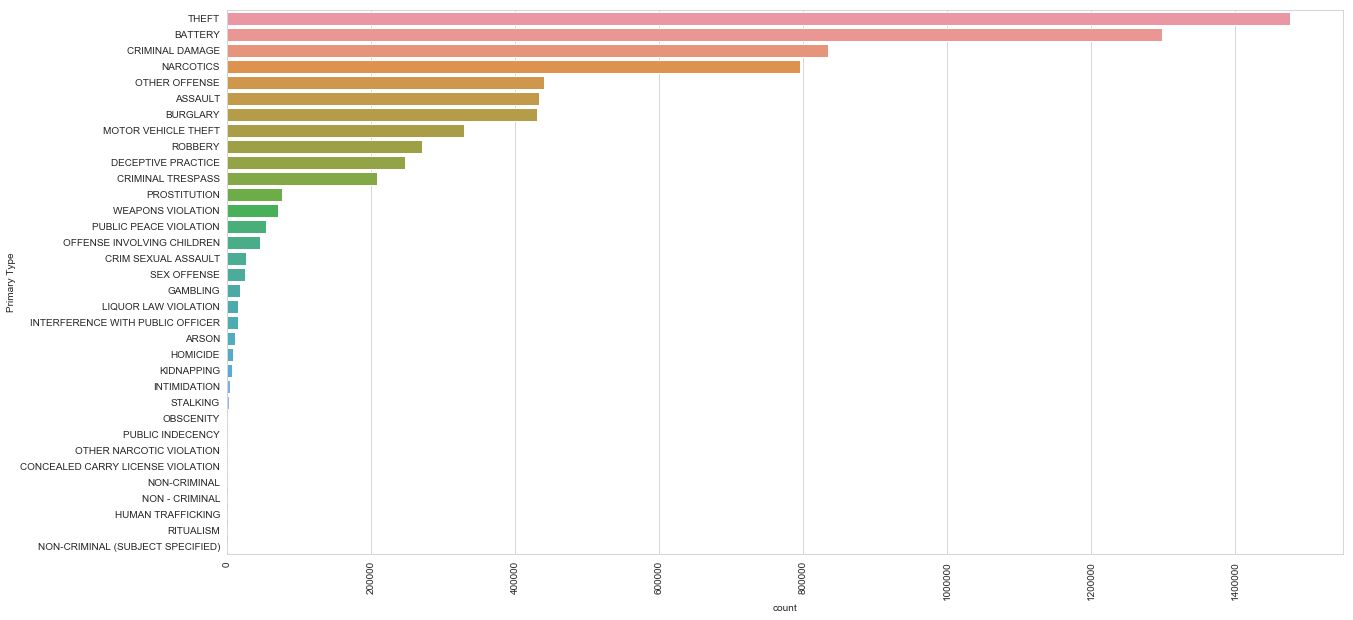

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_ts, y="Primary Type", order=df_ts['Primary Type'].value_counts().index)
plt.xticks(rotation=90)

### `Location Description`

In [63]:
print("Total # of locations :",df['Location Description'].nunique(), '\n')
df_ts['Location Description'].value_counts()

Total # of locations : 170 



STREET                                             1868058
RESIDENCE                                          1179073
SIDEWALK                                            767843
APARTMENT                                           759648
OTHER                                               257795
PARKING LOT/GARAGE(NON.RESID.)                      200347
ALLEY                                               164167
SCHOOL, PUBLIC, BUILDING                            155693
RESIDENCE-GARAGE                                    143065
RESIDENCE PORCH/HALLWAY                             124827
SMALL RETAIL STORE                                  121729
VEHICLE NON-COMMERCIAL                              120171
RESTAURANT                                          104913
GROCERY FOOD STORE                                   87635
DEPARTMENT STORE                                     85002
GAS STATION                                          75131
RESIDENTIAL YARD (FRONT/BACK)                        747

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000.]),
 <a list of 9 Text xticklabel objects>)

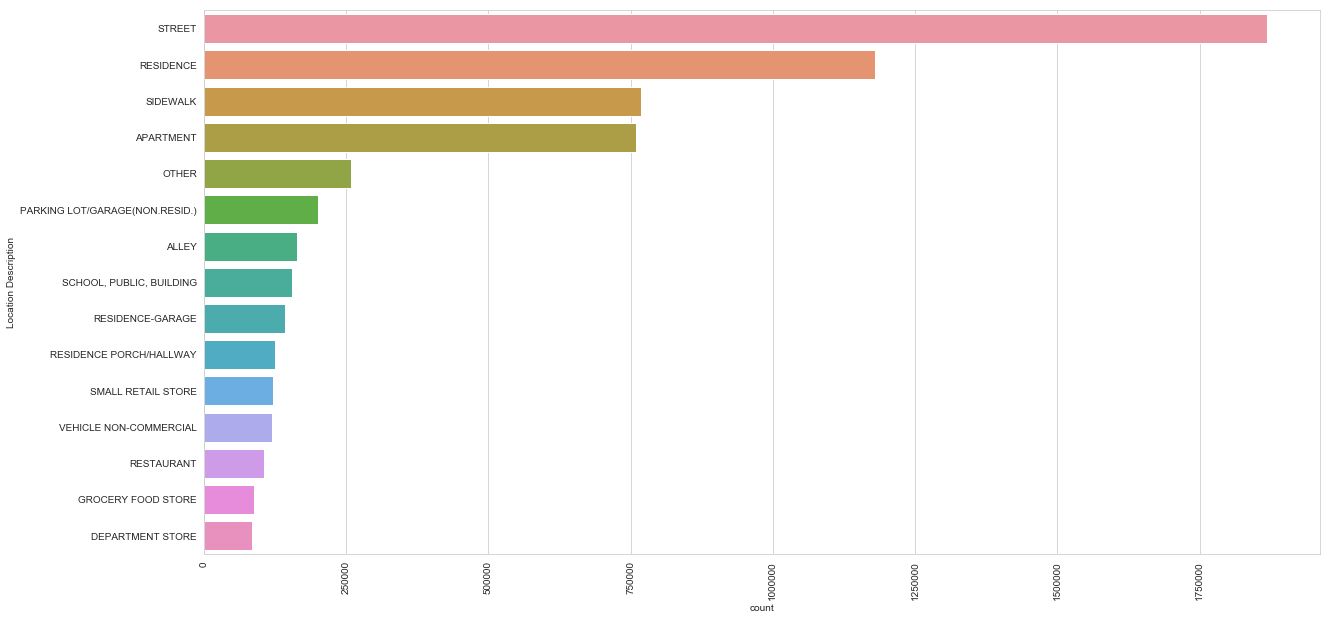

In [64]:
# plot the top 15 location description
plt.figure(figsize=(20,10))
sns.countplot(y='Location Description', data=df_ts, order=df_ts['Location Description'].value_counts().iloc[:15].index)
plt.xticks(rotation=90)

### resample data by time lines

In [65]:
# set date to index
df_ts.index = pd.DatetimeIndex(df_ts['Date'])

#### by years

In [72]:
# resample by year
df_ts.resample('Y').size()

Date
2001-12-31      4695
2002-12-31    344969
2003-12-31    471138
2004-12-31    384839
2005-12-31    450570
2006-12-31    791958
2007-12-31    620304
2008-12-31    839039
2009-12-31    771183
2010-12-31    697484
2011-12-31    350669
2012-12-31    334397
2013-12-31    304267
2014-12-31    269329
2015-12-31    259610
2016-12-31    250732
2017-12-31        30
Freq: A-DEC, dtype: int64

Text(0,0.5,'# Crimes')

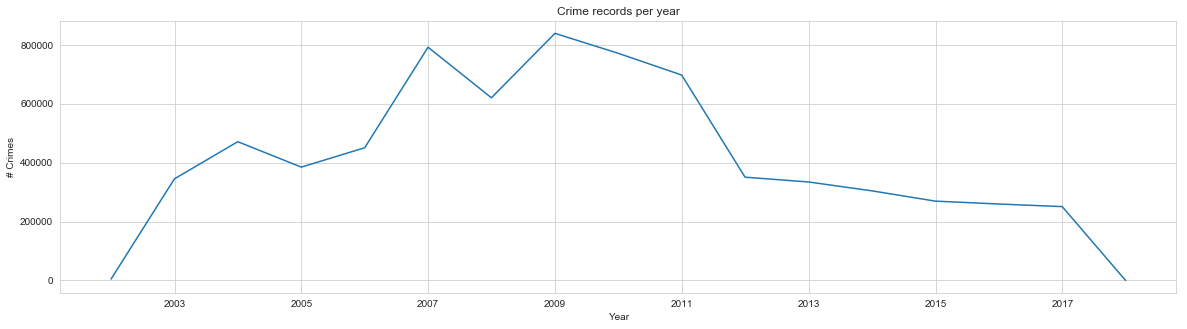

In [84]:
# plot resmapled data
plt.figure(figsize=(20,5))
plt.plot(df_ts.resample('Y').size())
plt.title("Crime records by year")
plt.xlabel("Year")
plt.ylabel("# Crimes")

- highest number of crimes recorded in 2009
- then in 2007
- the number of crimes are experiencing a downwards trend

#### by every quarter

Text(0,0.5,'# Crimes')

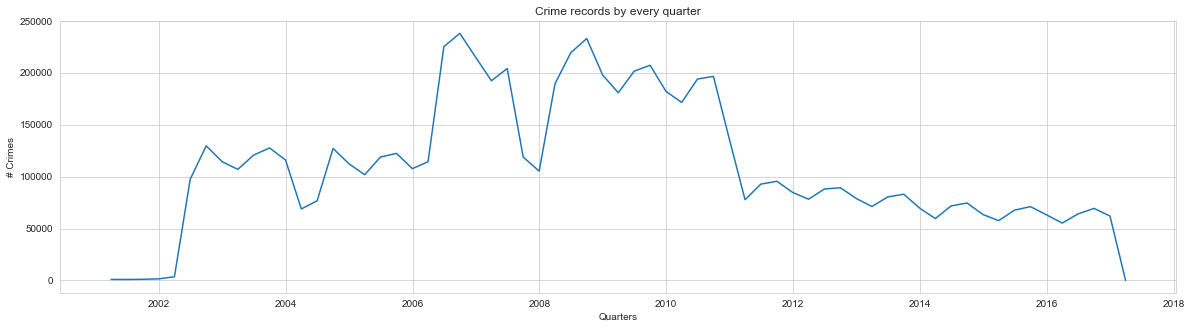

In [90]:
# resample by month
plt.figure(figsize=(20,5))
plt.plot(df_ts.resample("Q").size())
plt.title("Crime records by every quarter")
plt.xlabel("Quarters")
plt.ylabel("# Crimes")

- some seasonality can be observed every quarter

#### by month

Text(0,0.5,'# Crimes')

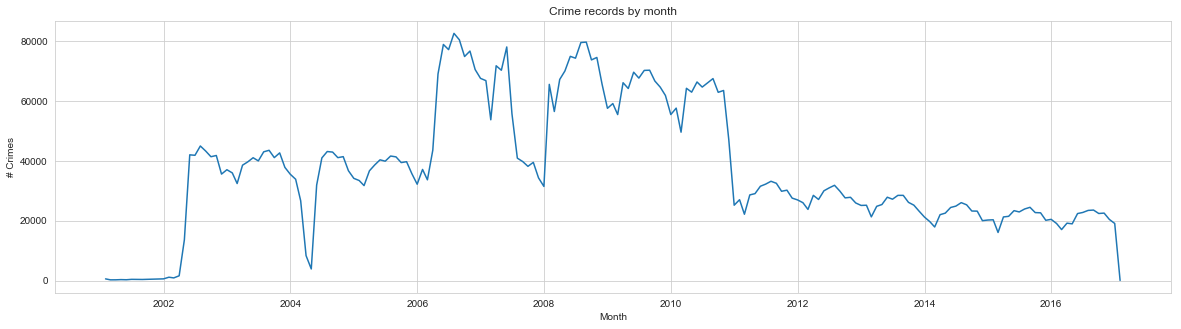

In [89]:
# resample by month
plt.figure(figsize=(20,5))
plt.plot(df_ts.resample("M").size())
plt.title("Crime records by month")
plt.xlabel("Month")
plt.ylabel("# Crimes")

- there seems to be a seasonality in the crime records by month
- therefore, we should sample our data by months before modelling

# Prepare data for Modeling

In [91]:
# create dataset for modelling with prophet
df_prophet = df_ts.resample("M").size().reset_index()

In [94]:
# update column names
df_prophet.columns = ['ds','y']

In [95]:
# metadata
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
ds    193 non-null datetime64[ns]
y     193 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [92]:
# preview dataset
df_prophet.head()

,Date,0
0,2001-01-31,553
1,2001-02-28,231
2,2001-03-31,242
3,2001-04-30,308
4,2001-05-31,264


In [99]:
df_prophet.tail()

,ds,y
188,2016-09-30,22402
189,2016-10-31,22530
190,2016-11-30,20428
191,2016-12-31,19070
192,2017-01-31,30


In [98]:
# dataset shape
print("# Rows : ", df_prophet.shape[0])
print("# Cols : ", df_prophet.shape[1])

# Rows :  193
# Cols :  2


# Modelling & Forecast

### Forecasting for 1 year in future

In [103]:
m = Prophet()  # initialize fbprophet model
m.fit(df_prophet)  # fit the model on dataset
future = m.make_future_dataframe(periods=365)  # create a placeholder for future predictions
forecast = m.predict(future)  # make forecast for 1 year in future

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
# preview forecast DataFrame
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,14646.389895,-7857.547609,23162.677415,14646.389895,14646.389895,-6559.405638,-6559.405638,-6559.405638,-6559.405638,-6559.405638,-6559.405638,0.0,0.0,0.0,8086.984257
1,2001-02-28,15167.402724,-9512.788655,20961.684998,15167.402724,15167.402724,-8601.759679,-8601.759679,-8601.759679,-8601.759679,-8601.759679,-8601.759679,0.0,0.0,0.0,6565.643045
2,2001-03-31,15744.238357,-2907.854673,27425.663779,15744.238357,15744.238357,-3939.047701,-3939.047701,-3939.047701,-3939.047701,-3939.047701,-3939.047701,0.0,0.0,0.0,11805.190656
3,2001-04-30,16302.466389,-1299.351550,29388.522136,16302.466389,16302.466389,-2049.177914,-2049.177914,-2049.177914,-2049.177914,-2049.177914,-2049.177914,0.0,0.0,0.0,14253.288475
4,2001-05-31,16879.302022,5197.977961,36074.657629,16879.302022,16879.302022,4686.340660,4686.340660,4686.340660,4686.340660,4686.340660,4686.340660,0.0,0.0,0.0,21565.642681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,6002.802606,-1742.084868,29811.409167,5494.169674,6456.652406,8252.418915,8252.418915,8252.418915,8252.418915,8252.418915,8252.418915,0.0,0.0,0.0,14255.221522
554,2018-01-28,5986.900022,-4396.709741,27455.077676,5476.735643,6443.707553,5167.879584,5167.879584,5167.879584,5167.879584,5167.879584,5167.879584,0.0,0.0,0.0,11154.779606
555,2018-01-29,5970.997438,-9229.430057,22273.089605,5459.301612,6430.755627,1806.949078,1806.949078,1806.949078,1806.949078,1806.949078,1806.949078,0.0,0.0,0.0,7777.946515
556,2018-01-30,5955.094853,-10118.954095,19051.479409,5441.686455,6416.748088,-1792.317635,-1792.317635,-1792.317635,-1792.317635,-1792.317635,-1792.317635,0.0,0.0,0.0,4162.777218


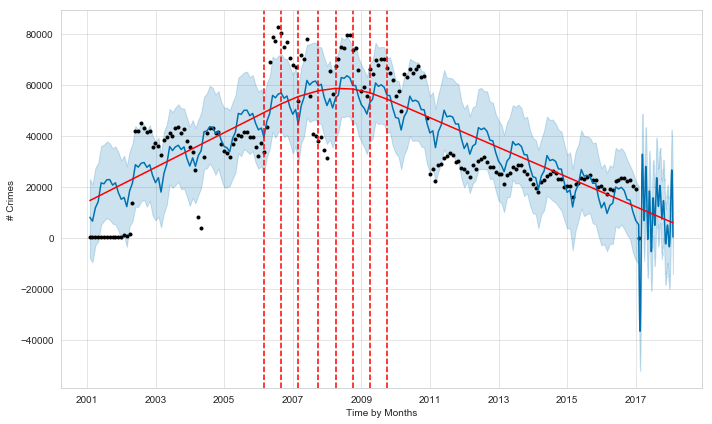

In [110]:
# visualize forecast
fig = m.plot(forecast, xlabel='Time by Months', ylabel="# Crimes")
a = add_changepoints_to_plot(fig.gca(), m, forecast)

- the forecasted crime records have huge fluctuations
- nonetheless, there is a general decline in the trend which is good news
- the peak was in 2009 when the number of crimes recorded was the maximum

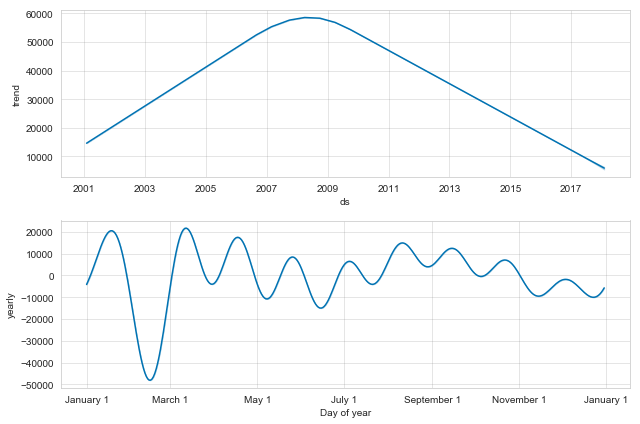

In [112]:
# let's observe the components
m.plot_components(forecast);

#### Trend
- the trend is downwards as seen before

#### Seasonality
- the crimes are higher in the summer time (around May, June)
- and similarly, the crime rates are lower in the winter time (around Jan, Feb & Mar)
    - it is freezing in Chicago in the winter months

### Forecasting for 2 years in future

In [113]:
# make predictions for the next 2 years
m2 = Prophet()
m2.fit(df_prophet)
future2 = m2.make_future_dataframe(periods=(365*2))
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


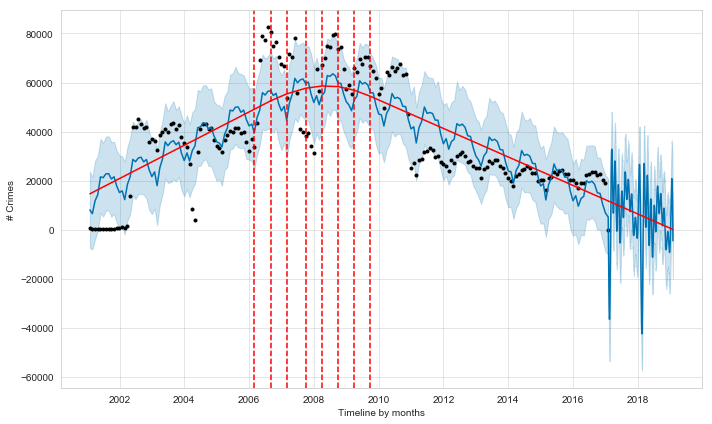

In [117]:
fig2 = m2.plot(forecast2, xlabel='Timeline by months', ylabel='# Crimes')
a2 = add_changepoints_to_plot(fig2.gca(), m2, forecast2)

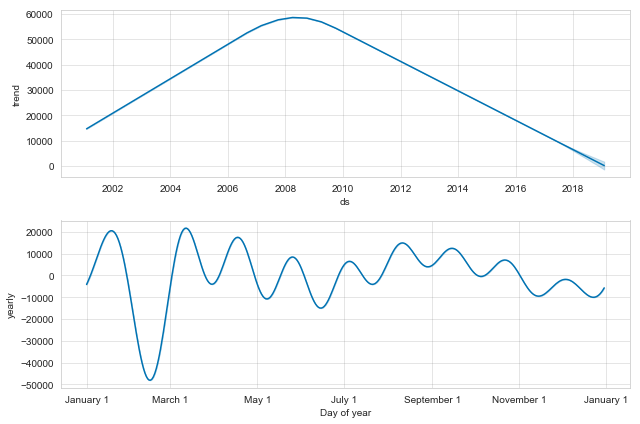

In [119]:
m2.plot_components(forecast2);

#### Trend
- the trend is still downwards when forecasting for two years

#### Seasonality
- the seasonality is also similar as previous forecast